In [5]:
"""" 
The bottom track of 2023's SD-1042 shows a 1 deg clockwise difference from bottom track velocity to opposite of vehicle velocity
when the vehicle heading has northward component. 
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys
import math
from numpy.linalg import norm
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from convert_dir import vector_dir_to_from, rotate_origin_only

In [4]:
### Info of SD-1042's merged adcp data
year = '2023'
platf_num = '1042'
path_cur_SD = '/Users/chi/Documents/projects/sd-ni-wp/data_manipulate/data_merge_adcp/'
tlim_plot = [datetime.datetime(int(year),10,24), datetime.datetime(int(year),10,25)] ### 2023 SD1042
tint = 3
nt_plot = int((tlim_plot[1]-tlim_plot[0]).days*24/tint)
tticks = [tlim_plot[0]+datetime.timedelta(hours=3*i) for i in range(nt_plot)]
tticks_label = [tticks[i].strftime('%m/%d %H') for i in range(len(tticks))]
print(tticks_label)
### load adcp data
ds_cur_SD = nc.Dataset(path_cur_SD+'adcp-raw-merge-'+year+'-SD'+platf_num+'.nc')
time = ds_cur_SD.variables['time'][:]
dtime_cur_SD = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
print(ds_cur_SD)
vars_str = ['longitude','latitude','vel_east','vel_north','depth']
for i in range( len(vars_str) ):
    temp = ds_cur_SD.variables[vars_str[i]][:]
    temp.filled(np.nan)
    exec( vars_str[i]+' = temp')
del time

['10/24 00', '10/24 03', '10/24 06', '10/24 09', '10/24 12', '10/24 15', '10/24 18', '10/24 21']
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Merged files for 2023 SD-1042
    subtitle: Only selected variables for adcp measurements are here. Temporal resolution is ~10-minute.
    dimensions(sizes): depth(50), time(6154), beam(4)
    variables(dimensions): float64 depth(depth), float64 time(time), float64 longitude(time), float64 latitude(time), float64 pitch(time), float64 roll(time), float64 heading(time), float64 vehicle_vel_east(time), float64 vehicle_vel_north(time), float64 vehicle_vel_up(time), float64 bt_vel_east(time), float64 bt_vel_north(time), float64 bt_vel_up(time), float64 vel_east(time, depth), float64 vel_north(time, depth), float64 vel_up(time, depth), float64 error_vel(time, depth), float64 percent_good_4_beam(time, depth), float64 percent_good_3_beam(time, depth), float64 percent_good(time, depth), float64 b

In [33]:
### rotate velocity by a degree in clockwise direction
deg_rot_cw = 1 # degree
vel_east_rot = np.nan*np.ones( vel_east.shape )
vel_north_rot = vel_east_rot.copy()
for z in range( len(depth) ):
    x = vel_east[:,z]
    y = vel_north[:,z]
    vel_east_rot[:,z], vel_north_rot[:,z] = rotate_origin_only( (x,y), math.radians(deg_rot_cw) )

<Figure size 432x288 with 0 Axes>

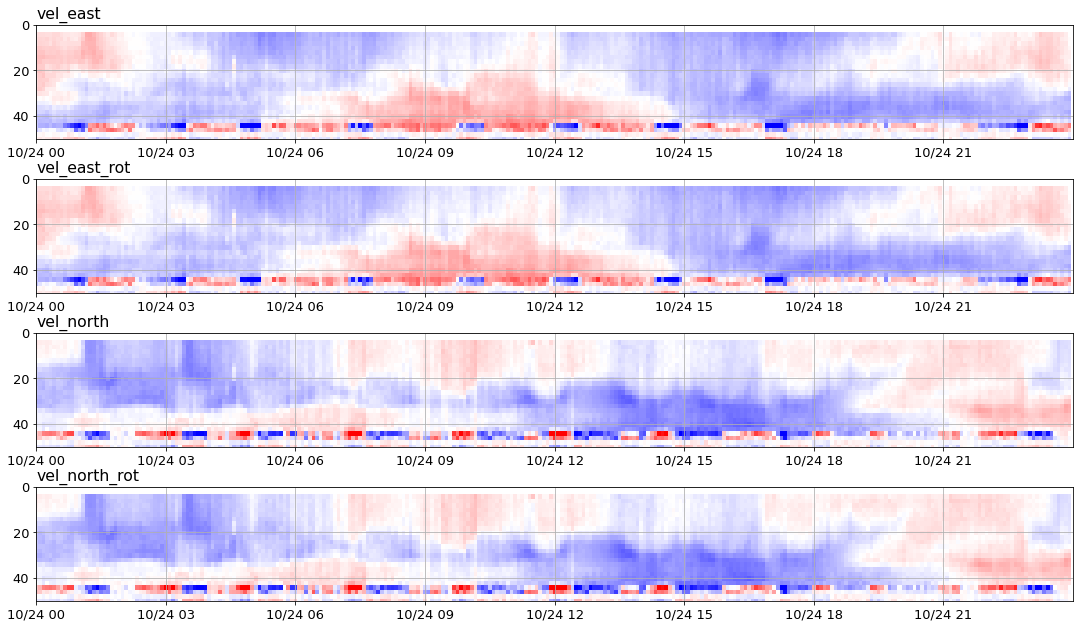

In [34]:
### plot current velocity time-depth contour plot - before & after rotate the adcp velocity vectors
varsnm_plot = ['vel_east','vel_east_rot','vel_north','vel_north_rot']
nrow = len(varsnm_plot)
itcur = np.where( (dtime_cur_SD>= tlim_plot[0]) & (dtime_cur_SD< tlim_plot[1]) )[0]
vellim = [-40,40]
cmap = 'bwr'
###
plt.clf()
fig, ax = plt.subplots(nrow)
plt.gcf().set_size_inches(18, 10)
plt.rcParams.update({'font.size': 13})
###
for i, varnm in enumerate( varsnm_plot ):
    var_plot = eval(varnm)
    plt.subplot(nrow,1,i+1)
    plt.pcolormesh(dtime_cur_SD[itcur],depth, 100*var_plot[itcur,:].transpose(),label=varnm,\
                   cmap=cmap,vmin=vellim[0],vmax=vellim[1])
    plt.title(varnm,loc='left')
    ###
    plt.xticks(tticks,rotation=0)
    plt.ylim([0,50])
    plt.gca().set_xticklabels(tticks_label)
    plt.xlim(tlim_plot)
    plt.gca().invert_yaxis()
    plt.grid()
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.35)


In [18]:
print(math.radians(180))

3.141592653589793
